<a href="https://colab.research.google.com/github/RichardTesla/datal/blob/main/Tweets_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Topic Classification

Business Understanding:

Twitter is a popular social media platform where users post and interact with short messages known as tweets. With millions of users and an extensive amount of content being generated daily, understanding the topics discussed on Twitter can provide valuable insights for businesses. Twitter topic classification involves the task of automatically categorizing tweets into relevant topics or themes. This process enables businesses to extract meaningful information, identify trends, monitor brand sentiment, and engage with their target audience effectively.

Objective:
The main objective of this is to categorize tweets into predefined topics. By achieving this, businesses can gain several benefits.

In [ ]:
#Import all Necessary Packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import json
from sklearn.metrics import classification_report, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
#Data Preparation
#Load Data
#from google.colab import files
#uploaded = files.upload()
# Open the JSON file
with open('CETM47-22_23-AS2-Data.json') as file:
      #Load the JSON data
      data = json.load(file)
# Convert the JSON data into a DataFrame
df = pd.DataFrame(data)
#df.drop(['id'], inplace=True, axis=1)
df.head()

,text,date,label,id,label_name
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming
3,"A year ago, Louisville struggled to beat an FC...",2019-09-08,4,1170516620466429953,sports_&_gaming
4,Anyone know why the #Dodgers #Orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming


In [ ]:
#Data Cleaning
#Tweets Preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_tweet(df):
    # Tokenize the tweet
    tokens = word_tokenize(df)
    
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove URLs and mentions
    tokens = [re.sub(r'http\S+|www\S+|@\w+', '', token) for token in tokens]
    
    # Remove special characters and punctuation
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back to a single string
    processed_tweet = ' '.join(tokens)
    
    return processed_tweet

# usage
tweet = "Just finished reading an awesome blog post! Check it out at http://example.com #blogging"
processed_tweet = preprocess_tweet(tweet)
print(processed_tweet)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


finished reading awesome blog post  check http  examplecom  blogging


<Axes: xlabel='count', ylabel='label_name'>

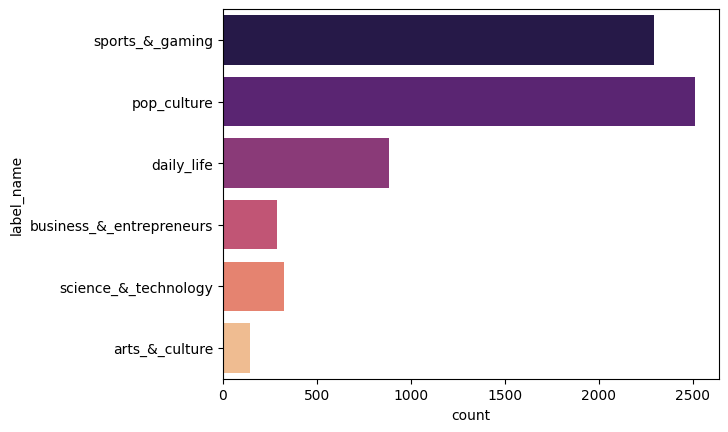

In [ ]:
#Data Visualization

sns.countplot(data = df, y = 'label_name', palette = 'magma')

In [ ]:
#Model Building
#Split Data into Training and Test Sets


x = df['text']
y = df['label_name']

x_train, xtest, y_train, ytest = train_test_split(x,y,test_size=0.15, random_state = 0)
xtrain, xval, ytrain, yval = train_test_split(x_train, y_train, test_size=0.30, random_state= 0)

xtest.shape, ytest.shape,xtrain.shape, ytrain.shape, yval.shape, xval.shape, 

((967,), (967,), (3833,), (3833,), (1643,), (1643,))

In [ ]:
ytrain.value_counts().plot.bar()
xtrain.value_counts().plot.bar

NameError: ignored

In [ ]:
#Creation and training of Pipeline for Tweets classification
pipe = Pipeline([('tfid',TfidfVectorizer()),('nb', MultinomialNB())])
pipe.fit(xtrain, ytrain)
ypred_initial = pipe.predict(xtrain)
print(classification_report(ytrain, ypred_initial))

                          precision    recall  f1-score   support

          arts_&_culture       0.00      0.00      0.00        83
business_&_entrepreneurs       0.00      0.00      0.00       158
              daily_life       0.98      0.12      0.21       547
             pop_culture       0.70      0.99      0.82      1470
    science_&_technology       0.00      0.00      0.00       191
         sports_&_gaming       0.81      0.99      0.90      1384

                accuracy                           0.76      3833
               macro avg       0.42      0.35      0.32      3833
            weighted avg       0.70      0.76      0.67      3833



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


HYPERPARAMETER TUNING:
Hyperparameter tuning is an important step in optimizing the performance of a machine learning model. It involves selecting the best combination of hyperparameters for the model to achieve better accuracy or other desired evaluation metrics.

In [ ]:
#Hyperparameter Tuning
param_grid = {
    'tfid__ngram_range':[(1,1),(1,2),(1,3)],
    'nb__alpha':[0.1,0.2,1.0],
    'nb__fit_prior':[True, False]
}

grid = GridSearchCV(pipe, param_grid, scoring='precision', cv= 10).fit(xval, yval)
grid.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _che

Pipeline(steps=[('tfid', TfidfVectorizer()), ('nb', MultinomialNB(alpha=0.1))])

In [ ]:
grid.best_score_,grid.best_params_

(nan, {'nb__alpha': 0.1, 'nb__fit_prior': True, 'tfid__ngram_range': (1, 1)})

Training on Full Data Set

In [ ]:
#Training on Full Data Set

x_train.shape, y_train.shape

((5476,), (5476,))

In [ ]:
final_model = Pipeline([('tfid',TfidfVectorizer(ngram_range=(1, 3))),
                        ('nb', MultinomialNB(alpha = 1.0, fit_prior = True))])
final_model.fit(x_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer(ngram_range=(1, 3))),
                ('nb', MultinomialNB())])

Testing

In [ ]:
#Testing
test_pred = final_model.predict(xtest)

print(classification_report(ytrain, ypred_initial))

                          precision    recall  f1-score   support

          arts_&_culture       0.00      0.00      0.00        83
business_&_entrepreneurs       0.00      0.00      0.00       158
              daily_life       0.98      0.12      0.21       547
             pop_culture       0.70      0.99      0.82      1470
    science_&_technology       0.00      0.00      0.00       191
         sports_&_gaming       0.81      0.99      0.90      1384

                accuracy                           0.76      3833
               macro avg       0.42      0.35      0.32      3833
            weighted avg       0.70      0.76      0.67      3833



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Training Precision:', precision_score(ytrain,ypred_initial, average='macro' ))
#print('Validation Precision:',grid.best_score_)
print('Testing Precision:', precision_score(ytest,test_pred, average='macro' ))



Training Precision: 0.4169415249947665
Testing Precision: 0.39702952803728


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test = pd.concat([xtest, ytest], axis=1)
test['Predicted'] = test_pred
test


,text,label_name,Predicted
4240,happy anniversary my free therapy Run {@BTS_twt@},daily_life,pop_culture
3335,happy new year everyone out there my best me...,daily_life,pop_culture
2243,I read the Strike novels by {@J K Rowling@} wh...,pop_culture,pop_culture
1597,The Pakistan Cricket Board (PCB) has launched ...,sports_&_gaming,pop_culture
4693,"1 Peter 2:17, KJV: Honour all men. Love the b...",arts_&_culture,pop_culture
...,...,...,...
3541,The only reason why Sarfarz came to open the i...,sports_&_gaming,sports_&_gaming
2729,I’m sure when {@IN THE FRIGHTS Disney s ESPANT...,pop_culture,pop_culture
4476,Wk 2: The Steelers lose to division rivals the...,sports_&_gaming,sports_&_gaming
2175,RECAP: THE SIMPSONS {@Yeardley Smith@} Talked ...,pop_culture,pop_culture


Evaluation

In [ ]:
# Compute the Confusion Matrix
ypred_initial = ypred_initial[:len(ytest)]

cm = confusion_matrix(ytest, ypred_initial)
print('Confusion Matrix')
print(cm)


Confusion Matrix
[[  0   0   0   9   0   9]
 [  0   0   0  26   0  23]
 [  0   0   1  73   0  50]
 [  0   0   3 188   0 178]
 [  0   0   3  31   0  29]
 [  0   0   5 198   0 141]]


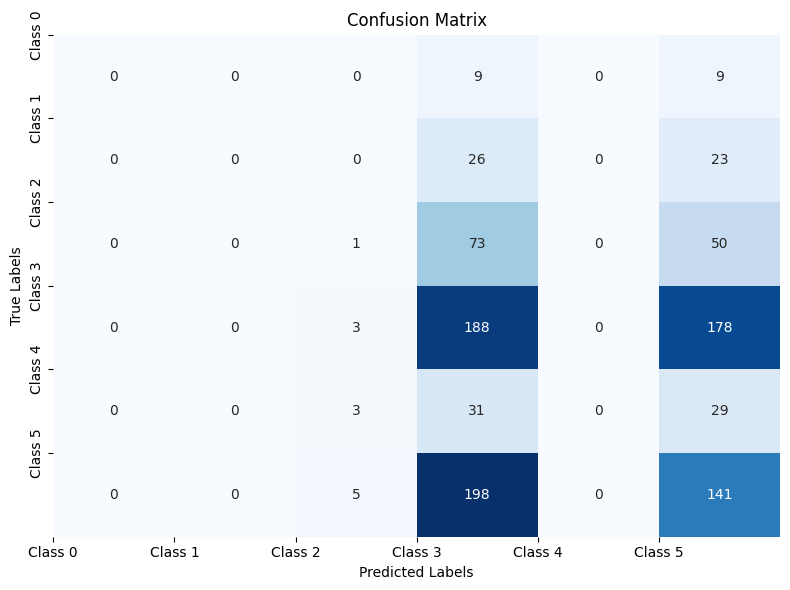

In [ ]:
#Visualization of the Evaluation Results

# Convert the confusion matrix values to a 2-dimensional numpy array
confusion_matrix = np.array(cm)

def plot_confusion_matrix(confusion_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.show()

# labels for the classes
labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix, labels)
